# Raport z projektu 1  - Feature Engineering i EDA
Autor: Ewa Szewczyk

//opis projektu, jego krótkie podsumowanie 

## Zadanie 1
Zapoznano się z biblioteką seaborn i jest podstawowymi możliwościami.

## Zadanie 2
Na stronie https://dane.gov.pl dane udostępniane są w różnych formatach takich jak csv, json, xlsx czy pdf. Dane te udostępniane są jako api, pliki lub strony internetowe. Są one oznaczane różnymi ikonami/etykietami pozwalającymi szybko sprawdzić ich stopień oczyszczenia, język, dostawcę czy dziedzinę z której pochodzą. Niektóre dane posiadają również podgląd w postaci tabelarycznej.
* //Czy jest jeden rodzaj api??

## Zadanie 3
Wybrano zestaw danych o tytule **Dane pomiarowe ESA (Edukacyjna Sieć Antysmogowa)** dostępny pod linkiem https://dane.gov.pl/pl/dataset/2913,dane-pomiarowe-esa-edukacyjna-siec-antysmogowa.

## Zadanie 4
#### 1 - Pobranie danych i zapoznanie się z ich opisem

In [34]:
# Importowanie potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Wczytanie pliku i wyświetlenie pierwszych danych
df = pd.read_csv('datasets/csv.csv')
df.head()

,NAME,STREET,POST_CODE,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP
0,SZKO?A PODSTAWOWA NR 16 W ZABRZU,UL. J?ZEFA LOMPY,41-806,ZABRZE,18.813958,50.287018,75.066667,993.941667,-2.416667,144.575000,118.000000,2023-04-05 00:00:00.0
1,SZKO?A PODSTAWOWA NR 1 IM. W?ADYS?AWA JAGIE??Y...,G??WNA,32-608,OSIEK,19.263141,49.951179,54.916667,993.000000,-0.875000,20.583333,14.083333,2023-04-05 00:00:00.0
2,SZKO?A PODSTAWOWA NR 4 IM. I SAMODZIELNEJ WARS...,UL. SIENKIEWICZA,72-300,GRYFICE,15.195127,53.912686,68.500000,1023.816667,3.241667,31.816667,26.375000,2023-04-05 00:00:00.0
3,SZKO?A PODSTAWOWA IM. JANA KOCHANOWSKIEGO W TO...,TOPORZYSKO,34-240,JORDAN?W,19.784055,49.620237,60.125000,959.166667,-3.108333,17.083333,11.916667,2023-04-05 00:00:00.0
4,SZKO?A PODSTAWOWA IM. JANA PAW?A II W RAC?AWIC...,UL. ZWYCI?STWA,48-250,RAC?AWICE ?L?SKIE,17.771528,50.311402,93.466667,1000.041667,-2.900000,73.775000,50.008333,2023-04-05 00:00:00.0


In [28]:
# Wyświetlenie podstawowych informacji o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             1637 non-null   object 
 1   STREET           1291 non-null   object 
 2   POST_CODE        1637 non-null   object 
 3   CITY             1637 non-null   object 
 4   LONGITUDE        1637 non-null   float64
 5   LATITUDE         1637 non-null   float64
 6   HUMIDITY_AVG     1635 non-null   float64
 7   PRESSURE_AVG     1635 non-null   float64
 8   TEMPERATURE_AVG  1635 non-null   float64
 9   PM10_AVG         1637 non-null   float64
 10  PM25_AVG         1637 non-null   float64
 11  TIMESTAMP        1637 non-null   object 
dtypes: float64(7), object(5)
memory usage: 153.6+ KB


In [29]:
# Wyświetlenie podstawowych informacji statystycznych o danych
df.describe()

,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG
count,1637.000000,1637.000000,1635.000000,1635.000000,1635.000000,1637.000000,1637.000000
mean,18.922788,51.210370,73.734336,1001.275560,-0.034975,39.011716,29.666371
std,2.341192,3.097855,13.328938,14.232379,3.324917,31.930047,25.520099
min,0.000000,0.000000,0.000000,930.000000,-40.000000,0.000000,0.000000
25%,16.993274,50.217696,65.758333,993.433333,-1.769697,17.866667,13.500000
50%,18.947709,51.158266,73.133333,1002.469231,-0.366667,29.933333,22.333333
75%,20.720270,52.384403,80.600000,1011.170833,1.100000,50.683333,36.077778
max,23.873936,54.661981,100.000000,1090.000000,36.600000,270.866667,209.308333


Dane opisują odczyty zebrane z czujników smogowych ulokowanych przy szkołach w Polsce takie jak temperatura, ciśnienie, data, współrzędne czujnika czy średnia zanotowana ilość pyłów PM10 i PM2.5. Należy zwrócić uwagę na minimalne wartości w kolumnach `LONGITUDE`, `LATITUDE` i `HUMIDITY_AVG` - w przypadku pierwszych dwóch kolumn na pewno sugerują one brakujące dane, natomiast w przypadku trzeciej kolumny nie jest to jeszcze pewne i należy to pozostawić do dalszego sprawdzenia w czasie EDA.

#### 2 - Użycie danych
Dane te mogą być użyte do monitorowania lub modelowania ilości szkodliwych pyłów w powietrzu w różnych regionach Polski. Możliwe są co najmniej dwa podejścia:
* Przewidywanie ilości pyłów według pory dnia w danym regionie - uczenie nadzorowane.
* Szukanie regionów o gorszej i lepszej jakości powietrza poprzez analizę skupisk - uczenie nienadzorowane.

#### 3 - Feature Engineering
Na początek sprawdzono ile danych jest brakujących. Postanowiono oznaczyć jako dane brakujące również wartości 0 dla kolumn `LONGITUDE` i `LATITUDE` w związku z faktem, że takie współrzędne na pewno nie występują w granicach Polski i z całą pewnością oznaczają brakujące dane.

In [35]:
# Sprawdzanie ilości brakujących danych w poszczególnych kolumnach
df['LONGITUDE'] = df.LONGITUDE.replace({0: np.nan})
df['LATITUDE'] = df.LATITUDE.replace({0: np.nan})
df.isnull().mean()

NAME               0.000000
STREET             0.211362
POST_CODE          0.000000
CITY               0.000000
LONGITUDE          0.003054
LATITUDE           0.003054
HUMIDITY_AVG       0.001222
PRESSURE_AVG       0.001222
TEMPERATURE_AVG    0.001222
PM10_AVG           0.000000
PM25_AVG           0.000000
TIMESTAMP          0.000000
dtype: float64

We wczytanych danych brakuje niektórych wartości w 6 kolumnach:
* W kolumnach `LONGITUDE`, `LATITUDE`, `HUMIDITY_AVG`, `PRESSURE_AVG` i `TEMPERATURE_AVG` brakuje mniej niż 5% danych, więc można usunąć te wiersze bez straty na jakości modelu.
* W kolumnie `STREET` brakuje ponad 20% danych, jednak biorąc pod uwagę fakt, że dostępne są inne, dokładniejsze wskaźniki położenia geograficznego czujników można je zastąpić wartościami "missing" ponieważ prawdopodobnie i tak nie będą brały udziały w fazie trenowania czy testowania modelu.

In [36]:
df_cleaned = df.copy()
df_cleaned['STREET'] = df_cleaned['STREET'].fillna('missing')
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().mean()

NAME               0.0
STREET             0.0
POST_CODE          0.0
CITY               0.0
LONGITUDE          0.0
LATITUDE           0.0
HUMIDITY_AVG       0.0
PRESSURE_AVG       0.0
TEMPERATURE_AVG    0.0
PM10_AVG           0.0
PM25_AVG           0.0
TIMESTAMP          0.0
dtype: float64

W powyższej komórce usunięto bądź zastąpiono brakujące dane.

Następnie sprawdzono ile unikatowych danych znajduje się w kolumnach ze zmiennymi kategorycznymi.

In [13]:
print(f'Ilość danych ogółem: {len(df_cleaned)}')

col_names = ['NAME', 'STREET', 'POST_CODE', 'CITY']

for col in col_names:
    print(f'Ilość unikatowych etykiet w kolumnie {col}: {len(df_cleaned[col].unique())}')


Ilość danych ogółem: 1635
Ilość unikatowych etykiet w kolumnie NAME: 1625
Ilość unikatowych etykiet w kolumnie STREET: 837
Ilość unikatowych etykiet w kolumnie POST_CODE: 1065
Ilość unikatowych etykiet w kolumnie CITY: 1104


Jak można zauważyć, istnieje wiele unikatowych etykiet w tych kolumnach. Najważniejszą, dającą potencjalnie największe znaczenie dla pszyszłego etapu uczenia maszynowego wydaje się być zmienna `POST_CODE` zawierająca kody pocztowe poszczególnych szkół. Z uwagi na jej strukturę, można zredukować liczbę etykiet w tej kolumnie poprzez użycie jedynie dwóch pierwszych znaków kodu pocztowego, które oznaczają strefy kodowe (https://pl.wikipedia.org/wiki/Kody_pocztowe_w_Polsce#Znaczenie_poszczeg%C3%B3lnych_cyfr).

In [41]:
# Redukcja etykiet
df_reduced = df_cleaned.copy()
df_reduced['POST_CODE'] = df_cleaned.POST_CODE.str[:2]

print(f'Ilość unikalnych etykiet w kolumnie POST_CODE: {len(df_reduced.POST_CODE.unique())}')

# Obliczenie procenta zredukowanych danych
n_before_reduction = len(df_cleaned.POST_CODE.unique())
n_after_reduction = len(df_reduced.POST_CODE.unique())
percent_reduced = (n_before_reduction-n_after_reduction)/n_before_reduction*100

print(f'Zredukowano liczbę etykiet o {round(percent_reduced, 2)}%')

Ilość unikalnych etykiet w kolumnie POST_CODE: 91
Zredukowano liczbę etykiet o 91.45%


Dzięki użyciu jedynie dwóch pierwszych cyfr kodu pocztowego udało się zredukować liczbę unikatowych etykiet o około 91 procent. 
Wiadomo jednak również, że pierwsza cyfra kodu pocztowego oznacza region pocztowy, których może być 10, a regiony znajdujące się w tym samym regionie pocztowym są również stosunkowo niedaleko od siebie położone. W związku z tym postanowiono o wyodrębnieniu nowej cechy, zawierającej tą informację.

In [42]:
df_reduced['POST_CODE_REGION'] = df_reduced.POST_CODE.str[:1]
df_reduced.head()

,NAME,STREET,POST_CODE,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP,POST_CODE_REGION
0,SZKO?A PODSTAWOWA NR 16 W ZABRZU,UL. J?ZEFA LOMPY,41,ZABRZE,18.813958,50.287018,75.066667,993.941667,-2.416667,144.575000,118.000000,2023-04-05 00:00:00.0,4
1,SZKO?A PODSTAWOWA NR 1 IM. W?ADYS?AWA JAGIE??Y...,G??WNA,32,OSIEK,19.263141,49.951179,54.916667,993.000000,-0.875000,20.583333,14.083333,2023-04-05 00:00:00.0,3
2,SZKO?A PODSTAWOWA NR 4 IM. I SAMODZIELNEJ WARS...,UL. SIENKIEWICZA,72,GRYFICE,15.195127,53.912686,68.500000,1023.816667,3.241667,31.816667,26.375000,2023-04-05 00:00:00.0,7
3,SZKO?A PODSTAWOWA IM. JANA KOCHANOWSKIEGO W TO...,TOPORZYSKO,34,JORDAN?W,19.784055,49.620237,60.125000,959.166667,-3.108333,17.083333,11.916667,2023-04-05 00:00:00.0,3
4,SZKO?A PODSTAWOWA IM. JANA PAW?A II W RAC?AWIC...,UL. ZWYCI?STWA,48,RAC?AWICE ?L?SKIE,17.771528,50.311402,93.466667,1000.041667,-2.900000,73.775000,50.008333,2023-04-05 00:00:00.0,4


Ostatnią kolumną którą postanowiono sprawdzić pod względem poprawności danych była kolumna `TIMESTAMP`

In [73]:
# Sprawdzenie wartości występujących w kolumnie TIMESTAMP
df_reduced.TIMESTAMP.value_counts()

2023-04-05 00:00:00.0    1630
Name: TIMESTAMP, dtype: int64

Wszystkie dane pochodzą z jednego dnia i godziny co sprawia, że ta kolumna nie będzie zbyt istotna dla predykcji, aczkolwiek sugeruje ona, że uzyskane estymacje będą ważne tylko w okresie roku odpowiadającym temu dniu. 

Postanowiono zamienić typ tej kolumny na datatime.

In [ ]:
df_final = df_reduced.copy()
df_final['TIMESTAMP'] = pd.to_datetime(df_reduced.TIMESTAMP)
df_final.info()

Na tym zakończono etap przetwarzania danych, ponieważ osiągnięte zostały wszystkie podstawowe cele:
* Kolumny mają poprawny, odpowiadający rzeczywistości typ danych (w szczególności kolumna `POST_CODE`, która mimo że jest zapisana w postaci liczbowej jest zmienną kategoryczną więc powinna zostać zapisana jako typ `string`)
* Przetworzono brakujące dane
* Zredukowano liczbę etykiet w umożliwiających to kolumnach

#### 4 - EDA

W celu głębszego poznania danych przeprowadzono Eksploracyjną Analizę Danych. Rozpoczęto od stworzenia wykresu przedstawiającego przestrzenne położenie poszczególnych szkół za pomocą kolumn `LATITUDE` i `LONGITUDE`.

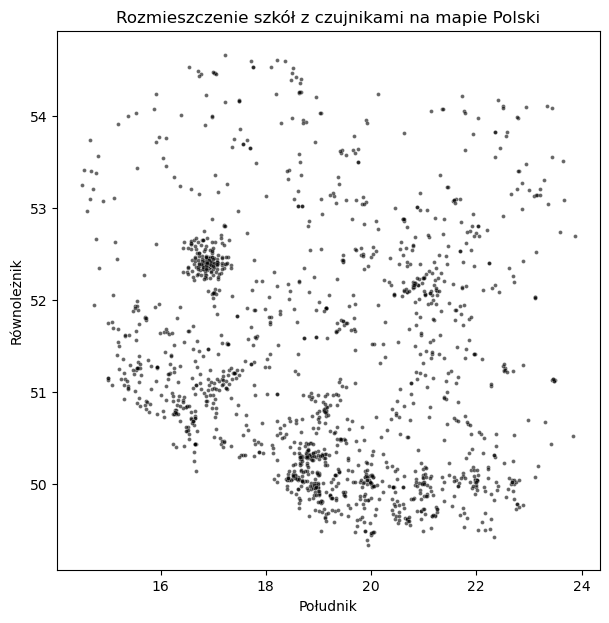

In [61]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(df_final, x='LONGITUDE', y='LATITUDE', ax=ax, s=8, color='k', alpha=0.6)
ax.set(title='Rozmieszczenie szkół z czujnikami na mapie Polski', 
    xlabel='Południk', ylabel="Równoleżnik")
plt.show()

Z powyższego wykresu można zauważyć, że współrzędne są w prawidłowych zakresach to znaczy, że wszystkie szkoły znajdują się w granicach Polski i nie istnieją żadne wartości odstające. Na powyższym wykresie, który można również nazwać mapą, można rozpoznać większe skupiska szkół przypadające na największe miasta w Polsce. Jest to spowodowane nie tylko ilością szkół, ale prawdopodobnie również faktem, że szkoły w dużych miastach są lepiej dofinansowane, uczestniczą w większej ilości programów i w związku z tym posiadają czujniki. Największe skupisko przypada na okolice miasta Poznań. Sugeruje to jednak również potencjalne problemy z modelem w przyszłości - model będzie lepiej predykował zanieczyszczenie powietrza w okolicach "bogatych" miast, natomiast predykcje dla pozostałych regionów mogą być obarczone błędem.

Następnie postanowiono zwizualizować rozkłady dla cech numerycznych.

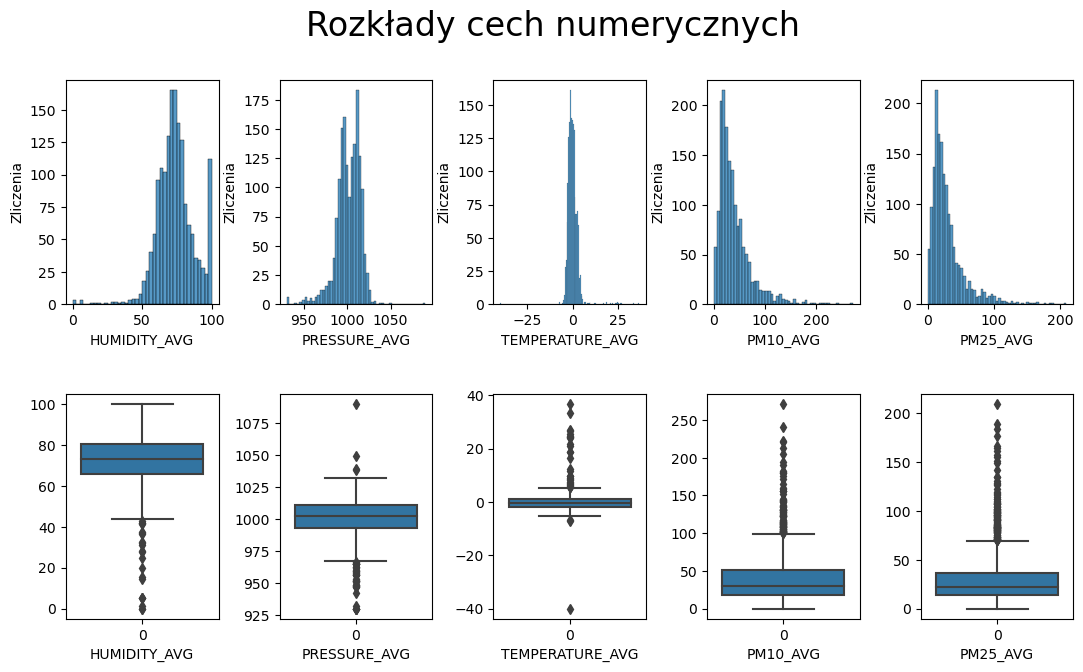

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(13, 7))

col_names = ['HUMIDITY_AVG', 'PRESSURE_AVG', 'TEMPERATURE_AVG', 'PM10_AVG', 'PM25_AVG']

for i, col in enumerate(col_names):
    sns.histplot(df_final[col], ax=axes[0, i])
    sns.boxplot(df_final[col], ax=axes[1, i])
    axes[0, i].set(ylabel='Zliczenia')
    axes[1, i].set(xlabel=col)

fig.suptitle('Rozkłady cech numerycznych', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Z rozkładów wartości poszczególnych cech numerycznych wyciągnięto następujące wnioski:
* W danych występuje wiele wartości ekstremalnych, niektóre prawdopodobnie na skutek problemów technicznych, a inne spowodowane ekstremalnymi warunkami.
* Szczególnie należy zwrócić uwagę na cechę `TEMPERATURE_AVG`, ponieważ wiadomo, że dane zostały zebrane 5 kwietnia, a temperatury o tej porze roku na stosunkowo niewielkim terenie, takim jak obszar Polski, nie mogę się od siebie aż tak znacząco różnić. Szczególnie zastanawia odczyt około -40 stopni Celsjusza, który jest prawie identyczny z aktualnym rekordem Polski pod względem najniższej temperatury - -41 stopni odczytane 11 stycznia 1940 roku w Siedlcach.
* Odczyty PM10 i PM25 dla niektórych szkół wydają się być ekstremalne, jednak możliwe. Dla poprawności działania modelu należałoby jednak pozbyć się części z nich.
* Odczyty wilgotności z niektórych czujników również wydają się być dosyć ekstremalne, gdyż uzyskanie tak niskiej wilgotności w kwietniu w tej strefie geograficznej wydaje się być niemożliwe.
* Dla wartości ciśnienia prawdopodobnie należałoby pozbyć się najbardziej odstającego wyniku znajdującego się w znacznej odległości od boxplotu, ponieważ o ile jest możliwy, o tyle może negatywnie wpłynąć na predykcje modelu.

2023-04-05 00:00:00.0    1637
Name: TIMESTAMP, dtype: int64